In [1]:
import glam
import pandas as pd
import numpy as np
import os.path

In [2]:
import matplotlib.pyplot as plt

from scipy.stats import invgauss

import seaborn as sns
import matplotlib.pyplot as plt
#plt.switch_backend('agg')

from scipy import stats

#import warnings
#warnings.filterwarnings('ignore')

In [3]:
np.random.seed(23) # from random.org

In [4]:
sufix = '_Like_FixBin5'

## Load data and GLAM structure 

In [5]:
data = pd.read_csv(str('data/FF2018_data/GlamDataFF2018_Like_Bin_v2.csv'))
# Subset only necessary columns
data = data[['subject', 'trial', 'choice', 'rt',
         'item_value_0', 'item_value_1',
         'gaze_0', 'gaze_1']]

In [6]:
glam_full = glam.GLAM(data)
glam_full.make_model('individual', gamma_bounds=(-1, 1), t0_val=0)

Generating single subject models for 33 subjects...


In [7]:
glam_full.estimates = np.load(str('results/estimates/glam_FF2018_full_hierarchical_cv'+sufix+'.npy'))

In [8]:
glam_full.estimates = pd.DataFrame.from_dict(glam_full.estimates.item(0))
glam_full.estimates


,SNR,SNR_mu,SNR_sd,b,gamma,gamma_mu,gamma_sd,p_error,s,t0,tau,tau_mu,tau_sd,v,v_mu,v_sd
0,185.37,163.26,31.44,1.0,-0.45,-0.51,0.35,0.05,0.008199,0.0,2.19,1.73,0.99,0.000044,0.000052,0.000011
1,168.78,163.26,31.44,1.0,-0.08,-0.51,0.35,0.05,0.010155,0.0,1.77,1.73,0.99,0.000063,0.000052,0.000011
2,147.59,163.26,31.44,1.0,0.38,-0.51,0.35,0.05,0.008840,0.0,2.43,1.73,0.99,0.000056,0.000052,0.000011
3,169.79,163.26,31.44,1.0,-0.59,-0.51,0.35,0.05,0.006967,0.0,2.40,1.73,0.99,0.000041,0.000052,0.000011
4,102.31,163.26,31.44,1.0,-0.61,-0.51,0.35,0.05,0.007075,0.0,3.88,1.73,0.99,0.000066,0.000052,0.000011
5,125.34,163.26,31.44,1.0,-0.29,-0.51,0.35,0.05,0.008380,0.0,0.33,1.73,0.99,0.000062,0.000052,0.000011
6,160.60,163.26,31.44,1.0,-0.63,-0.51,0.35,0.05,0.011196,0.0,0.82,1.73,0.99,0.000067,0.000052,0.000011
7,171.68,163.26,31.44,1.0,-0.48,-0.51,0.35,0.05,0.007631,0.0,1.39,1.73,0.99,0.000043,0.000052,0.000011
8,197.25,163.26,31.44,1.0,-0.97,-0.51,0.35,0.05,0.010153,0.0,1.06,1.73,0.99,0.000054,0.000052,0.000011
9,185.06,163.26,31.44,1.0,-0.48,-0.51,0.35,0.05,0.009120,0.0,1.73,1.73,0.99,0.000044,0.000052,0.000011


In [9]:
# We can define n_repeats (1 by default), boundary (1 by default), error_weight ( 0.05 by default) 
#glam_full.predict(n_repeats=50)


In [13]:
# Parameters for the simulations
n_repeats=50
boundary=1
error_weight=0.05

# Select subject number for the test

subject = 0

# Variables to run the simulation (repetitions give by n_repeats) for various trials
n_trials, n_items = 120,2
rts = np.zeros(n_trials * n_repeats) * np.nan
choices = np.zeros(n_trials * n_repeats) * np.nan
trial_idx = np.zeros(n_trials * n_repeats) * np.nan
repeat_idx = np.zeros(n_trials * n_repeats) * np.nan

running_idx = 0


## In case of running parameter simulations with various parameters combinations 
### [NOT FINISHED]

In [14]:
#value_tests = np.array([[5,5],[4,4],[3,3],[2,2],[1,1],[0,0]])
#gaze_tests = np.array([[0.1,0.9],[0.25,0.75],[0.4,0.6],[0.5,0.5],[0.6, 0.4],[0.75,0.25],[0.9, 0.1]])
#gaze_tests = np.array([[0.1,0.9],[0.25,0.75],[0.5,0.5],[0.75,0.25],[0.9, 0.1]])

value_tests = np.array([[5,5],[5,2.5],[5,0]])
gaze_tests = np.array([[0.5,0.5]])

print ('gaze ratio right/left used : ' + str(gaze_tests))



# [96 ,170, 230],    # SNR
# Since SNR is calculated  as  v * SNR = s we do not consider it as free paramter

#param_tests = np.array([[-0.97, -0.57, 0.34],  # gamma
#                      [0.30, 1.62, 3.81 ]  ,    # tau
#                       [3.2e-05, 4.9e-05, 7.1e-05 ],  # v
#                       [0.0065, 0.008, 0.011]]  # s
#                      )     
           
param_tests = np.array([np.linspace(-0.97, 0.34, num = 50),  # gamma
                      np.linspace(0.30, 3.81, num = 50)  ,    # tau
                       np.linspace(3.2e-05, 7.1e-05, num = 50),  # v
                       np.linspace(0.0065, 0.011, num = 50)]  # s
                      )     
middle_point = int(len(param_tests[0])/2)
rt_min = glam_full.data['rt'][glam_full.data['subject'] == subject].values.min()
rt_max = glam_full.data['rt'][glam_full.data['subject'] == subject].values.max()
error_range = (rt_min, rt_max)
                       

parameters_names = ['$\gamma$', '$\\tau$', '$\\nu$', 's']                  

n_repeats = 2



for param_select in range(param_tests.shape[0]): # iteration for the 4 params
    
    plt.figure(figsize=(20,10));
    sns.set(style='white', font_scale=1.8)

    running_idx_params = 0
    mean_rts_params = np.zeros((value_tests.shape[0] ,param_tests.shape[1])) * np.nan
    choice_params = np.zeros((value_tests.shape[0],param_tests.shape[1])) * np.nan

    for param_instance_select in range(param_tests.shape[1]): # iteration for (currently) 3 instances (min, median, max) for each parameter
        # we will vary on parameter at a time, we will mantain the rest of paramters constant at the middle level.
    
        gamma = param_tests[0][middle_point]
        tau = param_tests[1][middle_point]
        v = param_tests[2][middle_point]
        s = param_tests[3][middle_point]
        t0 = 0
        
        if param_select == 0:  #gamma
                    gamma = param_tests[0][param_instance_select]
        if param_select == 1:  #tau
                    tau = param_tests[1][param_instance_select]
        if param_select == 2:  #v
                    v = param_tests[2][param_instance_select]
        if param_select == 3:  #s
                    s = param_tests[3][param_instance_select]
        
        parameters = [v , gamma, s, tau, t0]
        
        
        
        
        running_idx_value = 0
        for trial in range(n_trials):

            
                n_trials, n_items = value_tests.shape

                for gaze_select in range(gaze_tests.shape[0]):
                
                    rts = np.zeros(n_repeats) * np.nan
                    choices = np.zeros(n_repeats) * np.nan
                    trial_idx = np.zeros(n_repeats) * np.nan
                    repeat_idx = np.zeros(n_repeats) * np.nan
                    running_idx = 0
                
                    for repeat in range(n_repeats):
                            
                            value_trial =value_tests[trial]
                            gaze_trial =gaze_tests[gaze_select]
                            
                            Evi_0, Evi_1, choice, rt = glam.driftSim.simulate_trial_drift(parameters, value_trial, gaze_trial,
                                                        boundary=boundary,
                                                        error_weight=error_weight,
                                                        error_range=error_range)
                
                            rts[running_idx] = rt
                            choices[running_idx] = choice
                            trial_idx[running_idx] = trial
                            repeat_idx[running_idx] = repeat
                            
                            running_idx += 1
                            
                       
                    # Calculate mean value for reaction times        
                    mean_rts =  rts.mean()              
                    mean_choice =  choices.sum()/choices.size  # choice left : 0 ; choice right : 1   
                    # Add the mean value for this parameters interation               
                    mean_rts_params [running_idx_value][running_idx_params] = mean_rts
                    choice_params [running_idx_value][running_idx_params] = mean_choice

                    running_idx_value += 1 

        
        running_idx_params += 1 
   

gaze ratio right/left used : [[ 0.5  0.5]]
lala
lala
lala
lala
lala
lala


IndexError: index 3 is out of bounds for axis 0 with size 3

<Figure size 1440x720 with 0 Axes>

## Run drift simulations for selected values and parameters

gaze ratio right/left used : [[ 0.5  0.5]]
value ratio right/left used : [[5 0]]
lala
lala
lala
lala
lala
lala
lala
lala
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.87179962  0.22638446  1.17337498  0.77809723  0.57743063  0.92488813
  0.75203625  0.66332727]
0.745917322229


<Figure size 1440x720 with 0 Axes>

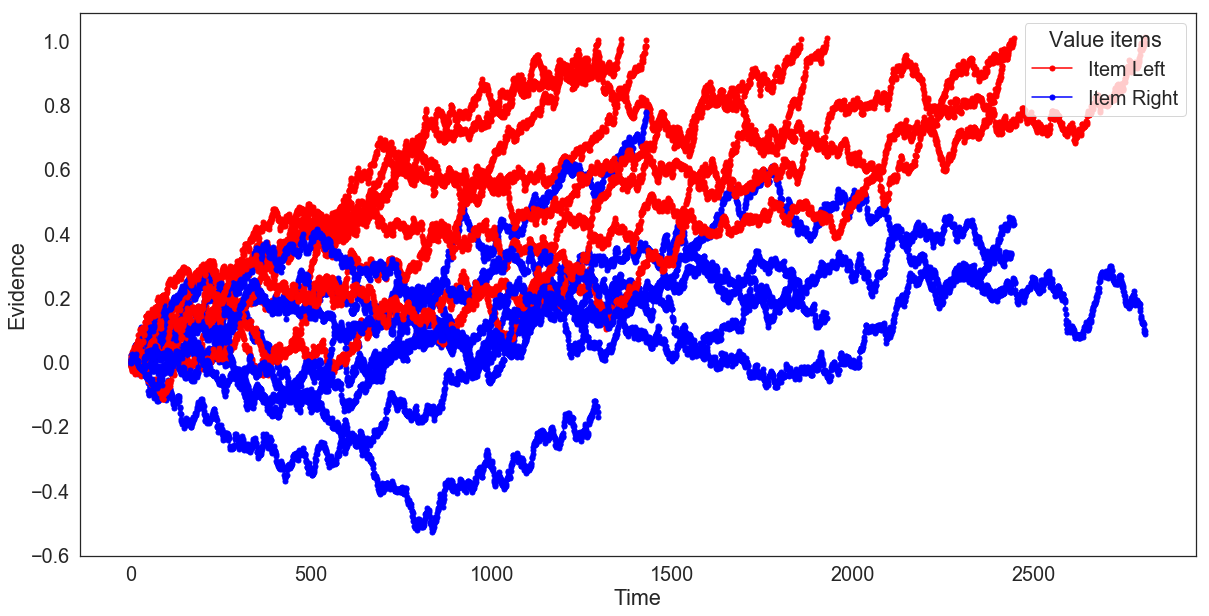

In [114]:
#value_tests = np.array([[5,5],[4,4],[3,3],[2,2],[1,1],[0,0]])
#gaze_tests = np.array([[0.1,0.9],[0.25,0.75],[0.4,0.6],[0.5,0.5],[0.6, 0.4],[0.75,0.25],[0.9, 0.1]])
#gaze_tests = np.array([[0.1,0.9],[0.25,0.75],[0.5,0.5],[0.75,0.25],[0.9, 0.1]])

#value_tests = np.array([[5,5],[5,2.5],[5,0]])
value_tests = np.array([[5,0]])
gaze_tests = np.array([[0.5,0.5]])

print ('gaze ratio right/left used : ' + str(gaze_tests))
print ('value ratio right/left used : ' + str(value_tests))
           
#param_tests = np.array([np.linspace(-0.97, 0.34, num = 50),  # gamma
#                      np.linspace(0.30, 3.81, num = 50)  ,    # tau
#                       np.linspace(3.2e-05, 7.1e-05, num = 50),  # v
#                       np.linspace(0.0065, 0.011, num = 50)]  # s
#                      )   

# Using median participant parameters for testing drift
param_tests = np.array([[ -0.57],  # gamma
                      [1.62 ]  ,    # tau
                       [ 4.9e-05],  # v
                       [ 0.008]]  # s
                      )    


middle_point = int(len(param_tests[0])/2)
rt_min = glam_full.data['rt'][glam_full.data['subject'] == subject].values.min()
rt_max = glam_full.data['rt'][glam_full.data['subject'] == subject].values.max()
error_range = (rt_min, rt_max)
                       

parameters_names = ['$\gamma$', '$\\tau$', '$\\nu$', 's']                  

n_repeats = 8



#for param_select in range(param_tests.shape[0]): # iteration for the 4 params
    
plt.figure(figsize=(20,10));
sns.set(style='white', font_scale=1.8)

running_idx_params = 0
mean_rts_params = np.zeros((value_tests.shape[0] ,param_tests.shape[1])) * np.nan
choice_params = np.zeros((value_tests.shape[0],param_tests.shape[1])) * np.nan

evidence_drifts_0 = []
evidence_drifts_1 = []

for param_instance_select in range(param_tests.shape[1]):
    # we will vary on parameter at a time, we will mantain the rest of paramters constant at the middle level.

    gamma = param_tests[0][middle_point]
    tau = param_tests[1][middle_point]
    v = param_tests[2][middle_point]
    s = param_tests[3][middle_point]
    t0 = 0

    
# NO parameter selection for now    
#    if param_select == 0:  #gamma
#                gamma = param_tests[0][param_instance_select]
#    if param_select == 1:  #tau
#                tau = param_tests[1][param_instance_select]
#    if param_select == 2:  #v
#                v = param_tests[2][param_instance_select]
#    if param_select == 3:  #s
#                s = param_tests[3][param_instance_select]
    
    parameters = [v , gamma, s, tau, t0]
    
    
    running_idx_value = 0
    for trial in range(n_trials):
        
            n_trials, n_items = value_tests.shape

            for gaze_select in range(gaze_tests.shape[0]):
                
                Delta_E = np.zeros(n_repeats) * np.nan            
                AbsDelta_E = np.zeros(n_repeats) * np.nan
                rts = np.zeros(n_repeats) * np.nan
                choices = np.zeros(n_repeats) * np.nan
                trial_idx = np.zeros(n_repeats) * np.nan
                repeat_idx = np.zeros(n_repeats) * np.nan
                running_idx = 0
            
                for repeat in range(n_repeats):
                        
                        value_trial =value_tests[trial]
                        gaze_trial =gaze_tests[gaze_select]
                        
                        Evi_0, Evi_1, choice, rt = glam.driftSim.simulate_trial_drift(parameters, value_trial, gaze_trial,
                                                    boundary=boundary,
                                                    error_weight=error_weight,
                                                    error_range=error_range)
                        
                        Delta_E[running_idx] = Evi_0[-1] - Evi_1[-1]
                        AbsDelta_E[running_idx] = abs(Evi_0[-1] - Evi_1[-1])                        
                        rts[running_idx] = rt
                        choices[running_idx] = choice
                        trial_idx[running_idx] = trial
                        repeat_idx[running_idx] = repeat
                        
                        evidence_drifts_0. append(Evi_0)
                        evidence_drifts_1. append(Evi_1)
                        
                        running_idx += 1
                        
                   
                # Calculate mean value for reaction times        
                mean_rts =  rts.mean()              
                mean_choice =  choices.sum()/choices.size  # choice left : 0 ; choice right : 1   
                # Add the mean value for this parameters interation               
                mean_rts_params [running_idx_value][running_idx_params] = mean_rts
                choice_params [running_idx_value][running_idx_params] = mean_choice

                running_idx_value += 1 

    
    running_idx_params += 1 

    
plt.figure(figsize=(20,10));
for i in range(0,len(evidence_drifts_0)) :
    plt.plot(range(0,len(evidence_drifts_0[i])), evidence_drifts_0[i] , marker='o', markersize=5, color="red");
    plt.plot(range(0,len(evidence_drifts_0[i])), evidence_drifts_1[i] , marker='o', markersize=5, color="blue");
    plt.ylabel('Evidence');
    plt.xlabel('Time');
    plt.legend((str('Item Left'), str('Item Right')),loc='upper right', title = 'Value items');
print(choices)
#print(Delta_E)
print(AbsDelta_E)
print(AbsDelta_E.mean())

## [END]

In [51]:
plt.subplot(121)        
plt.plot(param_tests[param_select], mean_rts_params[0] , marker='o', markersize=5, color="red");
plt.plot(param_tests[param_select], mean_rts_params[1] , marker='o', markersize=5, color="blue");
plt.plot(param_tests[param_select], mean_rts_params[2] , marker='o', markersize=5, color="green
plt.title("RT across parameters."+ "Parameter:  " + parameters_names[param_select]);
plt.ylabel('Reaction Time');
plt.xlabel('Parameter ' + parameters_names[param_select] );
plt.legend((str(value_tests[0]), str(value_tests[1]),str(value_tests[2])),loc='upper right', title = 'Value items');
plt.subplot(122)
plt.plot(param_tests[param_select], choice_params[0] , marker='o', markersize=5, color="red");
plt.plot(param_tests[param_select], choice_params[1] , marker='o', markersize=5, color="blue");
plt.plot(param_tests[param_select], choice_params[2] , marker='o', markersize=5, color="green");
plt.title("Proportion of right answers across params."+ "Parameter: " + parameters_names[param_select]);
plt.ylabel('Choice');
plt.xlabel('Parameter ' + parameters_names[param_select] );
plt.legend((str(value_tests[0]), str(value_tests[1]),str(value_tests[2])),loc='upper right', title = 'Value items');

SyntaxError: EOL while scanning string literal (<ipython-input-51-2464ad30179f>, line 4)